In [10]:
from IPython.core.interactiveshell import InteractiveShell
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import pickle
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import (
    Normalize, LogNorm,
    LinearSegmentedColormap,
    TwoSlopeNorm
)
import math
from matplotlib.ticker import (
    LogFormatterMathtext,
    PercentFormatter,
    FuncFormatter
)


InteractiveShell.ast_node_interactivity = "all"

In [38]:
# Download NASDAQ 100 data
ticker = "NDX"

In [35]:
# Download S&P 500 data
ticker = "GSPC"

In [39]:
file_name = ticker + '.csv'

In [41]:
if os.path.exists(file_name):
    data = pd.read_csv(file_name)
else:
    nasdaq_100
    data = yf.Ticker('^' + ticker)
    data = nasdaq_100.history(period="max")
    data = data.reset_index()
    data = data.rename(columns={'Date': 'date'})
    # data['year'] = data.date.year
    data.to_csv(file_name, index=False)

In [14]:
def percentage_formatter(x, pos):
    return '{:,.0f}%'.format(x * 100)

In [47]:
stat = 'probability'

In [43]:
stat = 'density'

Text(0.5, 1.0, 'NDX')

Profit / Loss,-90% to -45%,-45% to 0%,0% to 100%,100% to 300%,300% to 700%,"700% to 1,500%"
Years of Investment,,,,,,
1,2%,17%,80%,1%,0%,0%
4,5%,7%,59%,24%,6%,0%
16,0%,0%,7%,21%,53%,19%


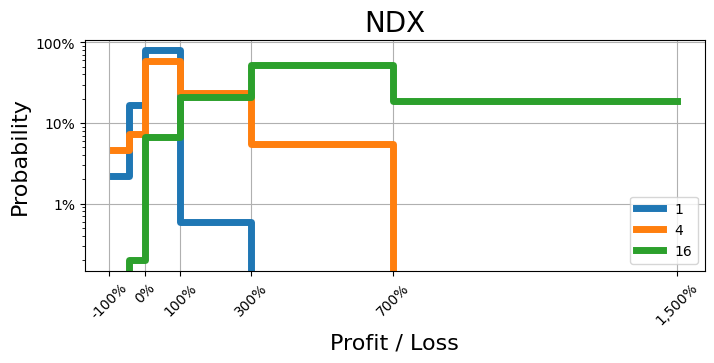

In [48]:
fig, ax = plt.subplots(figsize=(8, 3))

BUSSINESS_DAY_PER_YEAR = 252
NUMBER_OF_YEARS_ARRAY = np.array([1, 4, 16])

profit_loss = {}

profit_loss_df = pd.DataFrame()

for n_years in NUMBER_OF_YEARS_ARRAY:
    final_idx = len(data) - n_years * BUSSINESS_DAY_PER_YEAR
    profit_loss[n_years] = []
    for start_idx in range(final_idx):
        end_idx = start_idx + n_years * BUSSINESS_DAY_PER_YEAR
        price_sell = data['Close'].iloc[end_idx]
        price_buy = data['Close'].iloc[start_idx]
        profit_loss[n_years].append((price_sell - price_buy) / price_buy)

    profit_loss[n_years] = pd.Series(profit_loss[n_years])
    bins = np.hstack((
        np.arange(-0.9, 0, 0.45),
        np.array([0, 1, 3, 7, 15]),
        # np.arange(15),
    ))
    ax = sns.histplot(
        profit_loss[n_years],
        element="step",
        fill=False,
        label=n_years,
        stat=stat,
        bins=bins,
        linewidth=5,
        linestyle='-'
    )
    # Step 1: Binning the Data
    counts, bin_edges = np.histogram(profit_loss[n_years], bins=bins)

    # Step 2: Calculating the Probability for each bin
    total_count = profit_loss[n_years].count()
    probability = counts / total_count

    # Assign the probabilities to the corresponding column in your DataFrame
    profit_loss_df[n_years] = probability

legend_obj = plt.legend()
plt.grid()
plt.yscale('log')
x_ticks = plt.xticks(range(-1, 15))
y_ticks = ax.yaxis.set_major_formatter(PercentFormatter(1.0))
# ax.xaxis.set_major_formatter(PercentFormatter(1.0));
x_ticks = ax.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
x_ticks = ax.set_xticks([-1, 0, 1, 3, 7, 15])
x_ticks = plt.xticks(rotation=45)

y_label = plt.ylabel('Probability', fontsize=16)
x_label = plt.xlabel('Profit / Loss', fontsize=16)
profit_loss_df = profit_loss_df.transpose()

# Create the list of bin strings
bin_strings = []
for i in range(len(bins)-1):
    left_edge = bins[i] * 100  # Convert to percentage
    right_edge = bins[i + 1] * 100  # Convert to percentage
    bin_string = "{:,.0f}% to {:,.0f}%".format(left_edge, right_edge)
    bin_strings.append(bin_string)

profit_loss_df.columns = bin_strings
profit_loss_df.columns.name = 'Profit / Loss'
profit_loss_df.index.name = 'Years of Investment'
# plt.title(ticker + ' Probability of Profit/Loss')
plt.title(ticker, fontsize=20)
path = 'images//' + ticker + '_profit_loss_' + stat + '_curves.png'
plt.savefig(path, dpi=100, bbox_inches="tight", pad_inches=0.25)

# Multiply by 100
profit_loss_df *= 100

# Round to the nearest integer
profit_loss_df = (
    profit_loss_df.
    round(0)
    .astype(int)
    .astype(str) + '%'
)

profit_loss_df

# Alternative Visualization:

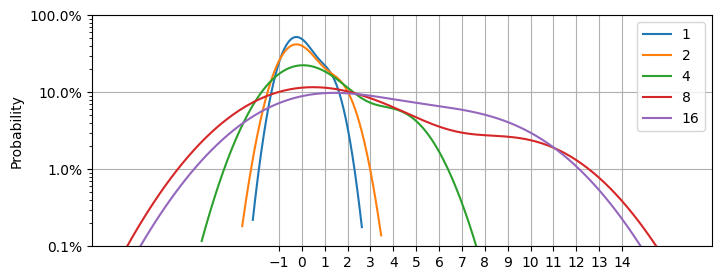

In [9]:
fig, ax = plt.subplots(figsize=(8, 3))

BUSSINESS_DAY_PER_YEAR = 252
NUMBER_OF_YEARS_ARRAY = np.array([1, 2, 4, 8, 16])

profit_loss = {}

for n_years in NUMBER_OF_YEARS_ARRAY:
    final_idx = len(data) - n_years * BUSSINESS_DAY_PER_YEAR
    profit_loss[n_years] = []
    for start_idx in range(final_idx):
        end_idx = start_idx + n_years * BUSSINESS_DAY_PER_YEAR
        price_sell = data['Close'].iloc[end_idx]
        price_buy = data['Close'].iloc[start_idx]
        profit_loss[n_years].append((price_sell - price_buy) / price_buy)

    profit_loss[n_years] = pd.Series(profit_loss[n_years])

    bins = np.hstack((
        np.arange(-0.9, 0, 0.3),
        np.array([0, 1, 3, 7, 15])
    ))

    # Bin the data
    binned_data = pd.cut(profit_loss[n_years], bins)

    # Group by the bins and calculate the mean for each bin
    bin_means = profit_loss[n_years].groupby(binned_data).mean()

    # Replace the original data with the mean of its bin
    smoothed_data = binned_data.map(bin_means)

    ax = sns.kdeplot(bin_means, label=n_years)

legend_obj = plt.legend()
plt.grid()
plt.yscale('log')
plt.xticks(range(-1, 15))
ax.yaxis.set_major_formatter(PercentFormatter(1.0, decimals=1))
plt.ylabel('Probability')
plt.ylim([0.001, 1])